<a href="https://colab.research.google.com/github/lx2348-lx/Liting-s-final-project/blob/main/Accountability_in_Numbers_Analyzing_the_Substantiation_Rate_of_NYPD_Misconduct_Complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Accountability in Numbers: Analyzing the Substantiation Rate of NYPD Misconduct Complaints**

**I. Introduction**

Civilian oversight of police departments is often deemed as a mechanism for accountability and public trust. However, in practice, substantiating police misconduct complaints, remains a persistent challenge, especially those in large, complex police forces like the New York Police Department (NYPD). Historically, the substantiation rate for civilian complaints has remained remarkably low. For example, between 2002–2006, the NYC Civilian Complaint Review Board (CCRB) substantiated only around 1–3% of total complaints, a figure that undermined public confidence in the institution’s effectiveness (Clarke, 2009). This low validation rate reflects deeper structural issues in the civilian oversight process, including resource limitations, resistance from police leadership, and narrow investigative powers.

When the majority of public complaints are dismissed or deemed unsubstantiated, how robust and meaningful is civilian oversight? This tension is further explored by legal scholars and advocacy groups. Recent survey-based research on the public perception of civilian oversight complicates the picture. Jackson Schiff et al. (2025) found that the mere existence of oversight bodies does not automatically lead to greater public trust. In some cases, when a civilian board’s recommendation conflicted with a police chief’s final decision, public trust in both institutions declined. These findings underscore that procedural justice, which is often perceived as fairness and transparency in the complaint process, is as crucial as outcome legitimacy.

Taken together, these insights point to a central issue: while the CCRB is tasked with civilian oversight, it operates within a constrained institutional framework that limits its impact. Investigating the current state of complaint substantiation and quantifying it through the available CCRB database can offer a concrete starting point for understanding accountability gaps. This project seeks to contribute to that conversation by offering a simple yet compelling visual and statistical representation of the substantiation rate among thousands of complaints filed against NYPD officers.

**II. Methodology**

This analysis uses the CCRB Complaint Database maintained by the New York Civil Liberties Union (NYCLU), which compiles misconduct allegations made against NYPD officers from 2000 through mid-2023. The dataset includes tens of thousands of complaint records, each with detailed attributes such as allegation type, incident date, officer demographics, and, the outcome of CCRB investigations (whether complaints were substantiated or not). These outcomes provide a valuable lens through which to examine patterns of accountability within the NYPD. By analyzing the proportion of substantiated versus unsubstantiated complaints, we aim to assess the degree to which civilian reports lead to formal recognition of misconduct. The scope and longitudinal depth of the CCRB dataset make it a uniquely powerful resource for evaluating police oversight practices in New York City.

To conduct this analysis, following libraries are employed. Pandas is to load and filter the dataset, perform grouping operations, and handle missing values. For visualization, I initially relied on matplotlib to create pie and bar charts that illustrate the distribution of complaint outcomes, and later refined my outputs using seaborn for clearer and more aesthetically engaging figures. In some exploratory phases, I also employed plotly to create interactive visualizations, although static charts proved more effective for concise storytelling. Throughout, data wrangling included dropping records with missing or ambiguous outcome labels and standardizing categorical values to ensure consistency in grouping and plotting.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
#I tried to read the dataset from Google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/CCRB Complaint Database Raw 04.28.2023.csv'
df = pd.read_csv(file_path)

df.head()

/tmp/ipython-input-825464673.py:4: DtypeWarning: Columns (23,25,26,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,AsOfDate,AllegationID,LastName,FirstName,OfficerRace,OfficerGender,TaxID,CurrentRank,CurrentRankLong,CurrentCommand,...,PenaltyDesc,LocationType,ContactReason,ContactOutcome,IncidentPrecinct,ImpactedRace,ImpactedGender,ImpactedAge,ReceivedDate,CloseDate
0,2023-04-28,240282.0,Wright,Curtis,Black,Male,895008,POM,Police Officer,114 PCT,...,NaN,Street/highway,PD suspected C/V of violation/crime - street,NaN,PCT 114,NaN,NaN,NaN,2000-01-03,2000-05-26
1,2023-04-28,240280.0,Wright,Curtis,Black,Male,895008,POM,Police Officer,114 PCT,...,NaN,Street/highway,PD suspected C/V of violation/crime - street,NaN,PCT 114,Black,Male/Man,24.0,2000-01-03,2000-05-26
2,2023-04-28,240281.0,Wright,Curtis,Black,Male,895008,POM,Police Officer,114 PCT,...,NaN,Street/highway,PD suspected C/V of violation/crime - street,NaN,PCT 114,Black,Male/Man,24.0,2000-01-03,2000-05-26
3,2023-04-28,240284.0,Rhoden,Kyle,Black,Male,899750,POM,Police Officer,MED DIV,...,NaN,Street/highway,PD suspected C/V of violation/crime - street,NaN,PCT 114,Black,Male/Man,24.0,2000-01-03,2000-05-26
4,2023-04-28,240283.0,Rhoden,Kyle,Black,Male,899750,POM,Police Officer,MED DIV,...,NaN,Street/highway,PD suspected C/V of violation/crime - street,NaN,PCT 114,Black,Male/Man,24.0,2000-01-03,2000-05-26


In [7]:
# I tried to identify which column provides the needed information.
df.columns

Index(['AsOfDate', 'AllegationID', 'LastName', 'FirstName', 'OfficerRace',
       'OfficerGender', 'TaxID', 'CurrentRank', 'CurrentRankLong',
       'CurrentCommand', 'IncidentRank', 'IncidentRankLong', 'IncidentCommand',
       'ShieldNo', 'DaysOnForce', 'Status', 'LastActive', 'ComplaintID',
       'IncidentDate', 'FADOType', 'Allegation', 'CCRBDisposition', 'BoardCat',
       'PenaltyRec', 'PenaltyCat', 'PenaltyDesc', 'LocationType',
       'ContactReason', 'ContactOutcome', 'IncidentPrecinct', 'ImpactedRace',
       'ImpactedGender', 'ImpactedAge', 'ReceivedDate', 'CloseDate'],
      dtype='object')

In [8]:
df['CCRBDisposition'].value_counts()

,count
CCRBDisposition,
Unsubstantiated,100871
Exonerated,60632
Complainant Uncooperative,39731
Unfounded,27228
Complaint Withdrawn,16585
Complainant Unavailable,14892
Substantiated (Charges),10931
Alleged Victim Uncooperative,6120
Substantiated (Command Discipline A),3546


In [9]:
# Create a simplified outcome column. I came into difficulties dealing with this step so I used Gemini for help.
df['DispositionCategory'] = df['CCRBDisposition'].apply(
    lambda x: 'Substantiated' if 'Substantiated' in str(x) else 'Not Substantiated'
)

In [10]:
counts = df['DispositionCategory'].value_counts()
print(counts)

DispositionCategory
Not Substantiated    278729
Substantiated         24072
Name: count, dtype: int64


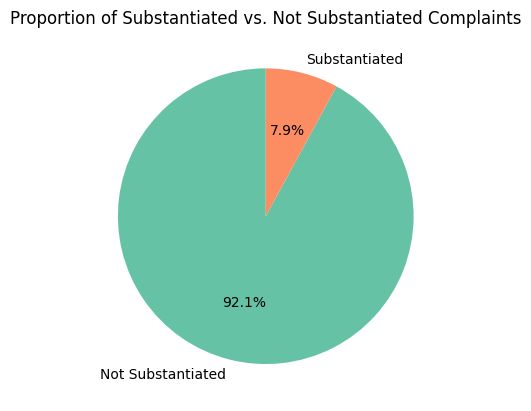

In [11]:
import matplotlib.pyplot as plt
#I came into difficulties dealing with this step so I used Gemini for help.
counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62'])
plt.title('Proportion of Substantiated vs. Not Substantiated Complaints')
plt.ylabel('')
plt.show()

**III. Results**

The CCRB data reveals a stark imbalance in complaint outcomes. After categorizing dispositions into either “Substantiated” or “Not Substantiated,” the analysis found that only 24,072 out of 302,801 total complaints were substantiated, representing merely 7.9% of all cases. The overwhelming majority, 278,729 complaints (92.1%), resulted in no substantiated findings. This outcome is visualized in Figure 1 below, which clearly illustrates the disproportionality in a pie chart.

Such a lopsided distribution raises immediate questions about the effectiveness of oversight mechanisms. Given that all cases included in the CCRB database were significant enough to be filed and reviewed, the exceptionally low substantiation rate may not merely reflect a lack of credible evidence, but potentially broader structural or procedural obstacles embedded within the complaint review process.

**IV. Discussion & Coclusion**

These results contribute to ongoing debates about police accountability and institutional transparency in New York City. Drawn from nearly two decades of complaints, the 7.9% substantiation rate suggests that the process through which civilian allegations are reviewed may systematically favor exoneration, dismissal, or deflection over disciplinary follow-through. This aligns with academic literature that critiques CCRBs and similar oversight bodies for lacking enforcement power or relying too heavily on internal police cooperation (Harris, 2010; Levine, 2014).

Moreover, the finding reflects not only bureaucratic friction, but may also imply a public trust deficit. Research shows that when oversight bodies are perceived as ineffective, victims are less likely to report misconduct at all, resulting in a chilling effect on democratic accountability (Rushin, 2017). The imbalance between complaints filed and actions taken thus mirrors a wider trend observed in cities across the U.S., where high complaint volumes rarely translate into officer consequences (Walker, 2001).

 Ultimately, while this project has only scratched the surface by examining a single binary variable, it underscores how the quantitative contours of substantiation rates can reveal deeper qualitative failures in the pursuit of justice. While a low substantiation rate may partly result from evidentiary standards or the complexity of policing contexts, the magnitude of this gap in a city with one of the most developed civilian review systems demands further scrutiny. The challenge ahead is not only to interpret these numbers but to act upon what they imply.

 Future research might explore which types of complaints are most likely to be substantiated and whether officer demographics, complaint type, or location influence outcomes. In short, while this chart alone cannot explain institutional behavior, it reveals a clear signal: the accountability pipeline is not functioning equitably.